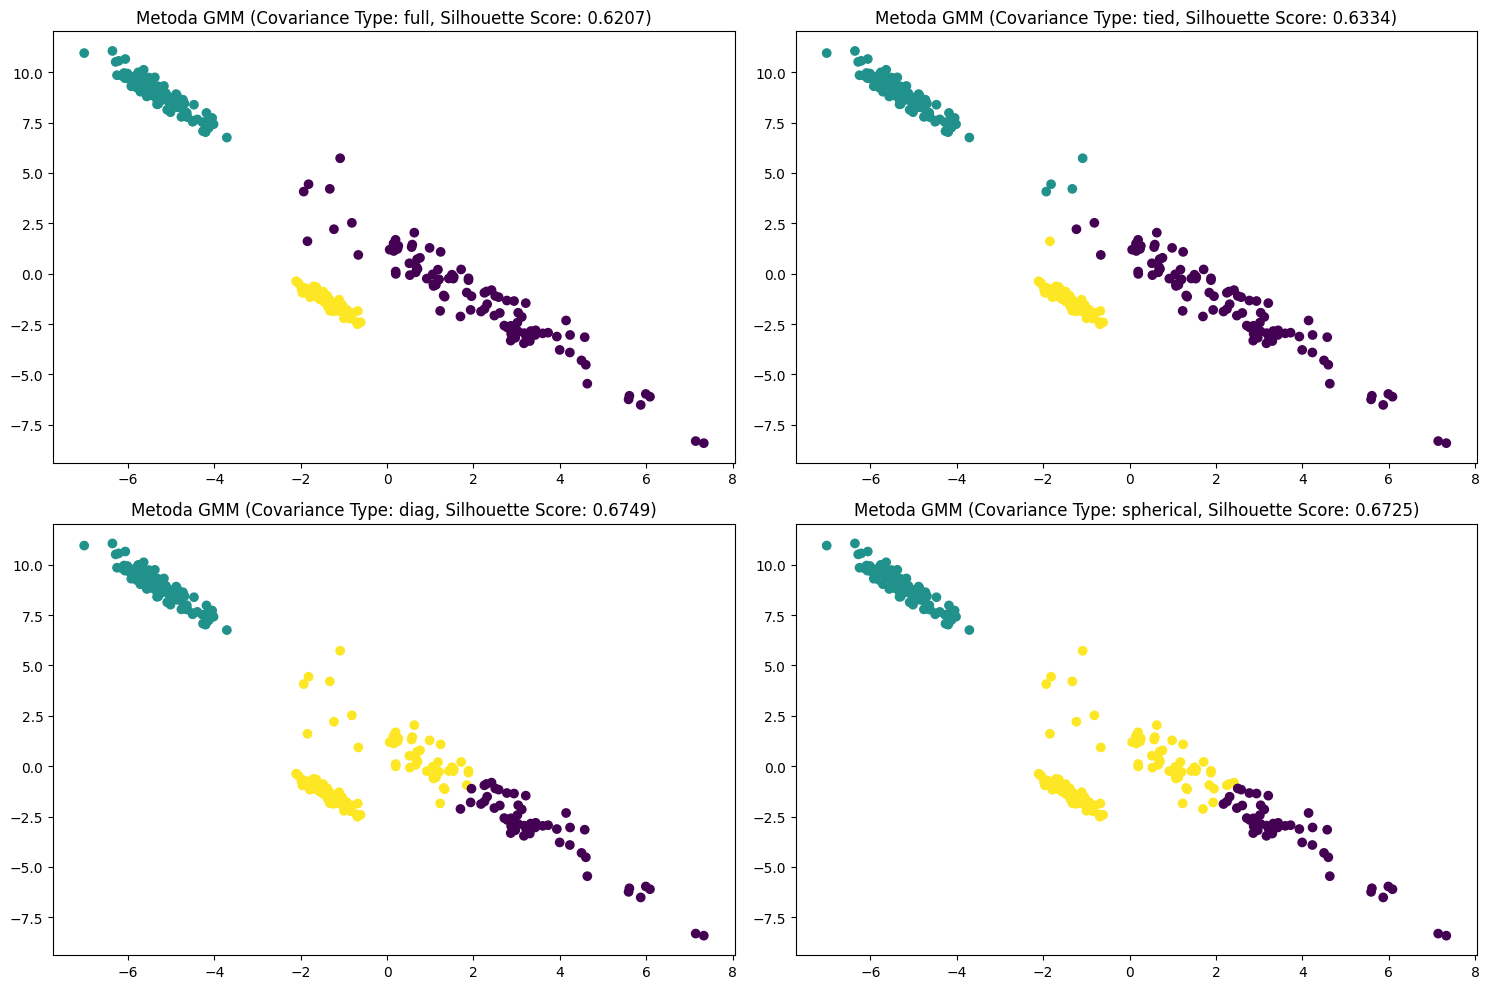

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

covariance_types = ['full', 'tied', 'diag', 'spherical']


plt.figure(figsize=(15, 10))

for i, cov_type in enumerate(covariance_types, 1):
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
    gmm_labels = gmm.fit_predict(X)
    gmm_silhouette = silhouette_score(X, gmm_labels)

    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
    plt.title(f'Metoda GMM (Covariance Type: {cov_type}, Silhouette Score: {gmm_silhouette:.4f})')

plt.tight_layout()
plt.show()